Danny Ryan

Lab 10

Social Network Analysis

3/22/2020

In [ ]:
from collections import Counter
from operator import itemgetter
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
import csv
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community 

In [ ]:
with open('quakers_nodelist.csv', 'r') as nodecsv: 
    nodereader = csv.reader(nodecsv) 
    nodes = [n for n in nodereader][1:]

node_names = [n[0] for n in nodes] 

with open('quakers_edgelist.csv', 'r') as edgecsv: 
    edgereader = csv.reader(edgecsv) 
    edges = [tuple(e) for e in edgereader][1:] 

In [ ]:
print(len(node_names))

119


In [ ]:
print(len(edges))

174


In [ ]:
G = nx.Graph()
G.add_nodes_from(node_names)
G.add_edges_from(edges)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 119
Number of edges: 174
Average degree:   2.9244


In [ ]:
hist_sig_dict = {}
gender_dict = {}
birth_dict = {}
death_dict = {}
id_dict = {}

for node in nodes: 
    hist_sig_dict[node[0]] = node[1]
    gender_dict[node[0]] = node[2]
    birth_dict[node[0]] = node[3]
    death_dict[node[0]] = node[4]
    id_dict[node[0]] = node[5]

In [ ]:
nx.set_node_attributes(G, hist_sig_dict, 'historical_significance')
nx.set_node_attributes(G, gender_dict, 'gender')
nx.set_node_attributes(G, birth_dict, 'birth_year')
nx.set_node_attributes(G, death_dict, 'death_year')
nx.set_node_attributes(G, id_dict, 'sdfb_id')

In [ ]:
for n in G.nodes():
  print(n, G.nodes[n]['birth_year'])

Joseph Wyeth 1663
Alexander Skene of Newtyle 1621
James Logan 1674
Dorcas Erbery 1656
Lilias Skene 1626
William Mucklow 1630
Thomas Salthouse 1630
William Dewsbury 1621
John Audland 1630
Richard Claridge 1649
William Bradford 1663
Fettiplace Bellers 1687
John Bellers 1654
Isabel Yeamans 1637
George Fox the younger 1551
George Fox 1624
John Stubbs 1618
Anne Camm 1627
John Camm 1605
Thomas Camm 1640
Katharine Evans 1618
Lydia Lancaster 1683
Samuel Clarridge 1631
Thomas Lower 1633
Gervase Benson 1569
Stephen Crisp 1628
James Claypoole 1634
Thomas Holme 1626
John Freame 1665
John Swinton 1620
William Mead 1627
Henry Pickworth 1673
John Crook 1616
Gilbert Latey 1626
Ellis Hookes 1635
Joseph Besse 1683
James Nayler 1618
Elizabeth Hooten 1562
George Whitehead 1637
John Whitehead 1630
William Crouch 1628
Benjamin Furly 1636
Silvanus Bevan 1691
Robert Rich 1607
John Whiting 1656
Christopher Taylor 1614
Thomas Lawson 1630
Richard Farnworth 1630
William Coddington 1601
Thomas Taylor 1617
Richard 

In [ ]:
density = nx.density(G)
print("Network Density:", density)

Network Density: 0.02478279447372169


In [ ]:
fell_whitehead_path = nx.shortest_path(G, source="Margaret Fell", target="George Whitehead")

print("Shortest path between Fell and Whitehead:", fell_whitehead_path)

Shortest path between Fell and Whitehead: ['Margaret Fell', 'George Fox', 'George Whitehead']


In [ ]:
print("Length of that path:", len(fell_whitehead_path)-1)


Length of that path: 2


In [ ]:

print(nx.is_connected(G))

components = nx.connected_components(G)
largest_component = max(components, key=len)

subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

False
Network diameter of largest component: 8


In [ ]:
triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.16937799043062202


In [ ]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

In [ ]:
print(G.nodes['William Penn'])


{'historical_significance': 'Quaker leader and founder of Pennsylvania', 'gender': 'male', 'birth_year': '1644', 'death_year': '1718', 'sdfb_id': '10009531', 'degree': 18}


In [ ]:
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)


In [ ]:
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('George Fox', 22)
('William Penn', 18)
('James Nayler', 16)
('George Whitehead', 13)
('Margaret Fell', 13)
('Benjamin Furly', 10)
('Edward Burrough', 9)
('George Keith', 8)
('Thomas Ellwood', 8)
('Francis Howgill', 7)
('John Perrot', 7)
('John Audland', 6)
('Richard Farnworth', 6)
('Alexander Parker', 6)
('John Story', 6)
('John Stubbs', 5)
('Thomas Curtis', 5)
('John Wilkinson', 5)
('William Caton', 5)
('Anthony Pearson', 5)


In [ ]:
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

In [ ]:
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
('William Penn', 0.23999456006192205)
('George Fox', 0.23683257726065216)
('George Whitehead', 0.12632024847366005)
('Margaret Fell', 0.12106792237170329)
('James Nayler', 0.10446026280446098)
('Benjamin Furly', 0.06419626175167242)
('Thomas Ellwood', 0.046190623885104545)
('George Keith', 0.045006564009171565)
('John Audland', 0.04164936340077581)
('Alexander Parker', 0.03893676140525336)
('John Story', 0.028990098622866983)
('John Burnyeat', 0.028974117533439564)
('John Perrot', 0.02829566854990583)
('James Logan', 0.026944806605823553)
('Richard Claridge', 0.026944806605823553)
('Robert Barclay', 0.026944806605823553)
('Elizabeth Leavens', 0.026944806605823553)
('Thomas Curtis', 0.026729751729751724)
('John Stubbs', 0.024316593960227152)
('Mary Penington', 0.02420824624214454)


In [ ]:
sorted_eig = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by eigenvector centrality:")
for b in sorted_eig[:20]:
    print(b)

Top 20 nodes by eigenvector centrality:
('George Fox', 0.4491750710859924)
('James Nayler', 0.3352974100447867)
('William Penn', 0.2703220115399868)
('Margaret Fell', 0.253170949905681)
('George Whitehead', 0.2497455334914196)
('Edward Burrough', 0.23147427604862297)
('Francis Howgill', 0.1909539378268105)
('Benjamin Furly', 0.1878520634691651)
('John Perrot', 0.1849692807795611)
('George Keith', 0.18384690867915351)
('Thomas Ellwood', 0.17608142535843857)
('Richard Farnworth', 0.15368535029296415)
('John Crook', 0.1327158126880779)
('Rebecca Travers', 0.1184804064465093)
('Alexander Parker', 0.11587808682088324)
('Anthony Pearson', 0.11120476725256784)
('William Dewsbury', 0.11057869321157121)
('John Stubbs', 0.10693500692141825)
('John Audland', 0.0983088971933375)
('Thomas Salthouse', 0.09548628544138771)


In [ ]:
#First get the top 20 nodes by betweenness as a list
top_betweenness = sorted_betweenness[:20]

#Then find and print their degree
for tb in top_betweenness: # Loop through top_betweenness
    degree = degree_dict[tb[0]] # Use degree_dict to access a node's degree, see footnote 2
    print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)

Name: William Penn | Betweenness Centrality: 0.23999456006192205 | Degree: 18
Name: George Fox | Betweenness Centrality: 0.23683257726065216 | Degree: 22
Name: George Whitehead | Betweenness Centrality: 0.12632024847366005 | Degree: 13
Name: Margaret Fell | Betweenness Centrality: 0.12106792237170329 | Degree: 13
Name: James Nayler | Betweenness Centrality: 0.10446026280446098 | Degree: 16
Name: Benjamin Furly | Betweenness Centrality: 0.06419626175167242 | Degree: 10
Name: Thomas Ellwood | Betweenness Centrality: 0.046190623885104545 | Degree: 8
Name: George Keith | Betweenness Centrality: 0.045006564009171565 | Degree: 8
Name: John Audland | Betweenness Centrality: 0.04164936340077581 | Degree: 6
Name: Alexander Parker | Betweenness Centrality: 0.03893676140525336 | Degree: 6
Name: John Story | Betweenness Centrality: 0.028990098622866983 | Degree: 6
Name: John Burnyeat | Betweenness Centrality: 0.028974117533439564 | Degree: 4
Name: John Perrot | Betweenness Centrality: 0.0282956685

In [ ]:
communities = community.greedy_modularity_communities(G)


In [ ]:
modularity_dict = {} # Create a blank dictionary
for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

# Now you can add modularity information like we did the other metrics
nx.set_node_attributes(G, modularity_dict, 'modularity')

In [ ]:
# First get a list of just the nodes in that class
class0 = [n for n in G.nodes() if G.nodes[n]['modularity'] == 0]

# Then create a dictionary of the eigenvector centralities of those nodes
class0_eigenvector = {n:G.nodes[n]['eigenvector'] for n in class0}

# Then sort that dictionary and print the first 5 results
class0_sorted_by_eigenvector = sorted(class0_eigenvector.items(), key=itemgetter(1), reverse=True)

print("Modularity Class 0 Sorted by Eigenvector Centrality:")
for node in class0_sorted_by_eigenvector[:5]:
    print("Name:", node[0], "| Eigenvector Centrality:", node[1])

Modularity Class 0 Sorted by Eigenvector Centrality:
Name: William Penn | Eigenvector Centrality: 0.2703220115399868
Name: George Keith | Eigenvector Centrality: 0.18384690867915351
Name: William Bradford | Eigenvector Centrality: 0.06812170326615953
Name: Tace Sowle | Eigenvector Centrality: 0.04688085927497436
Name: James Logan | Eigenvector Centrality: 0.044474460267486554


In [ ]:
for i,c in enumerate(communities): # Loop through the list of communities
    if len(c) > 2: # Filter out modularity classes with 2 or fewer nodes
        print('Class '+str(i)+':', list(c)) # Print out the classes and their members

Class 0: ['Isabel Yeamans', 'Jane Sowle', 'Tace Sowle', 'Samuel Bownas', 'David Lloyd', 'Isaac Norris', 'Joseph Besse', 'Edward Haistwell', 'John Bartram', 'James Logan', 'Peter Collinson', 'Thomas Story', 'Richard Claridge', 'George Keith', 'Anne Conway Viscountess Conway and Killultagh', 'William Bradford', 'William Penn']
Class 1: ['George Fox the younger', 'Thomas Aldam', 'William Gibson', 'William Tomlinson', 'Richard Farnworth', 'Francis Howgill', 'Hannah Stranger', 'Robert Rich', 'Elizabeth Leavens', 'Anthony Pearson', 'Thomas Holme', 'James Nayler', 'Margaret Fell', 'Thomas Lower', 'Dorcas Erbery', 'Martha Simmonds', 'Gervase Benson']
Class 2: ['Thomas Salthouse', 'John Crook', 'William Crouch', 'Leonard Fell', 'Edward Burrough', 'William Mead', 'Elizabeth Hooten', 'William Mucklow', 'Mary Fisher', 'William Coddington', 'Ellis Hookes', 'John Perrot', 'William Dewsbury', 'Mary Prince', 'George Fox']
Class 3: ['Silvanus Bevan', 'Alice Curwen', 'Sir Charles Wager', 'Richard Hubber

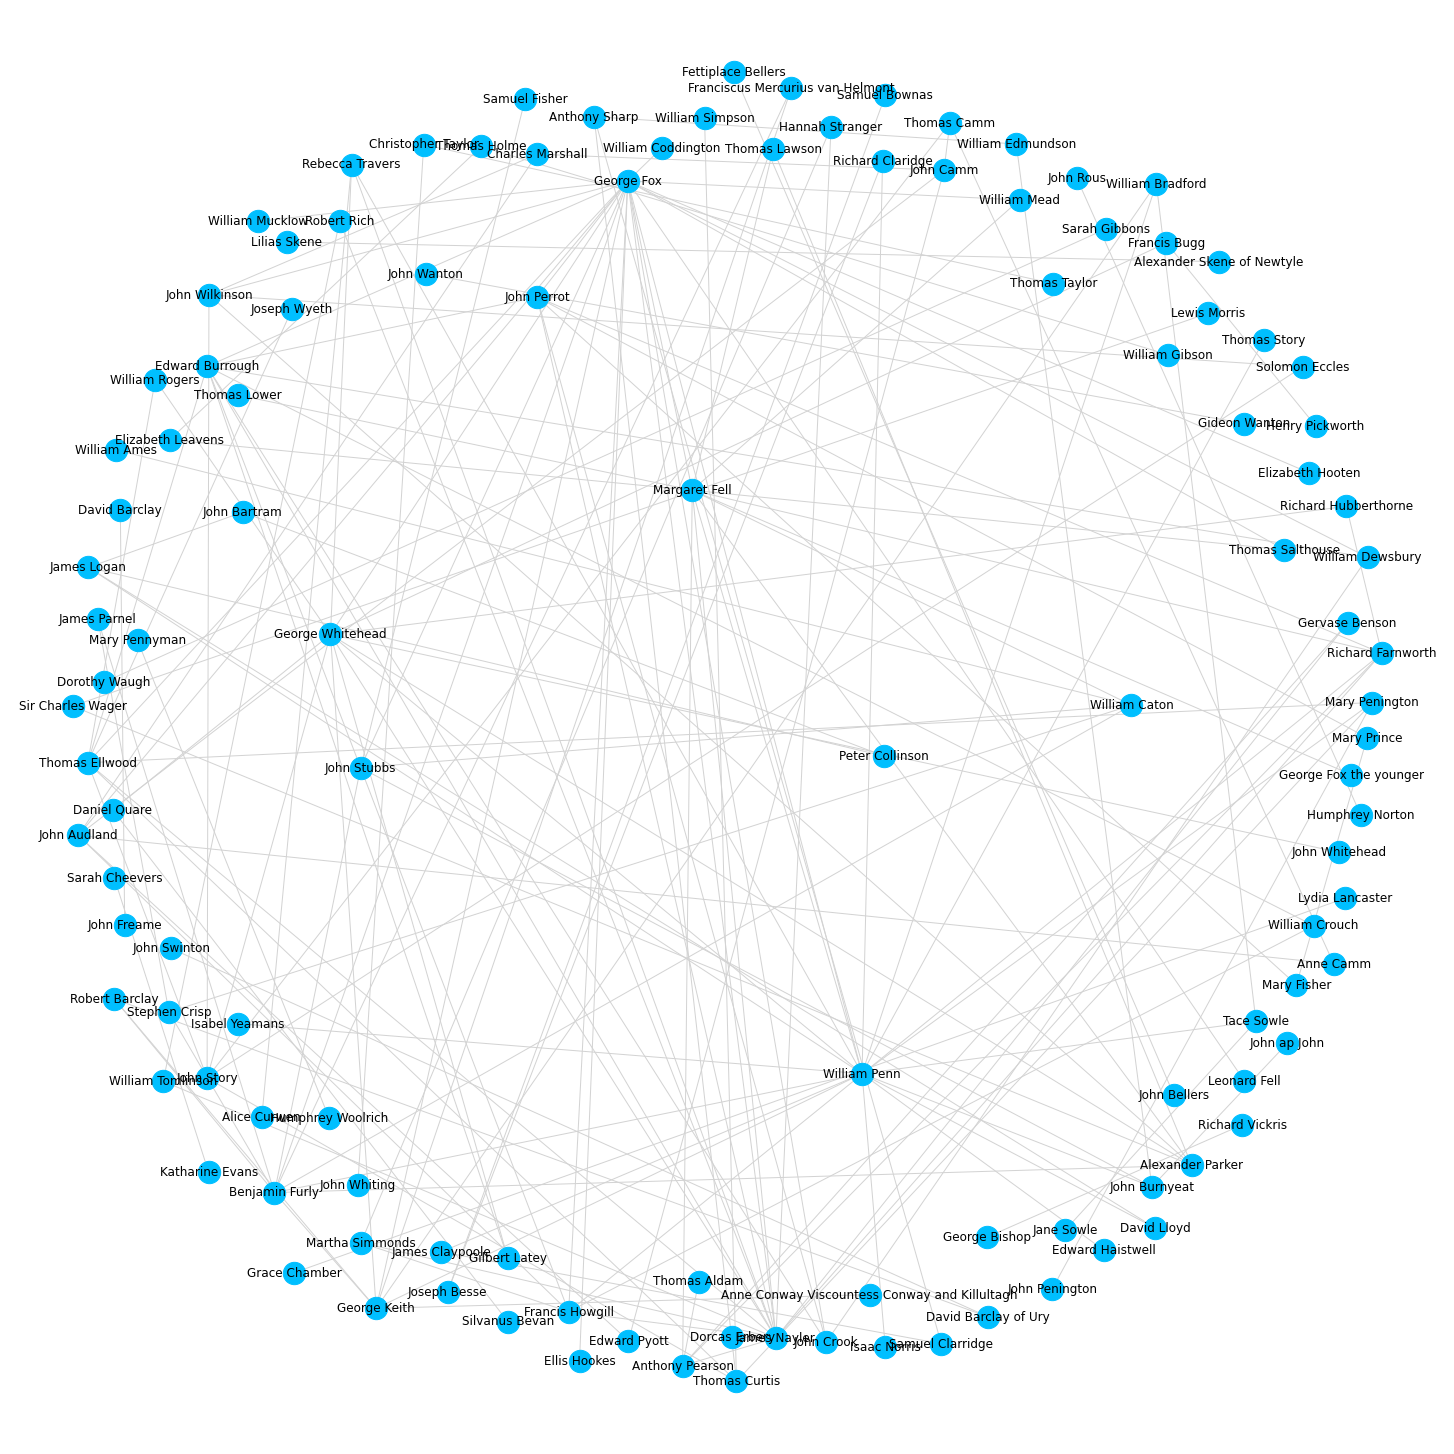

In [ ]:
plt.figure(figsize =(20,20))
pos = nx.spring_layout(G, k = 2)
nx.draw(G,pos = pos, node_size = 500, node_color='deepskyblue', with_labels= True, edge_color= "lightgray")
plt.show()

I would say the structure of the graph is very sparse. The majority of the data points are around the outside of the circle, and only a couple nodes are in the middle of the circle. This means most of the points are only connected to a couple other nodes. 

Modularity Class 0 Sorted by Eigenvector Centrality:
Name: William Penn | Eigenvector Centrality: 0.2703220115399868
Name: George Keith | Eigenvector Centrality: 0.18384690867915351
Name: William Bradford | Eigenvector Centrality: 0.06812170326615953
Name: Tace Sowle | Eigenvector Centrality: 0.04688085927497436
Name: James Logan | Eigenvector Centrality: 0.044474460267486554

See code below for the shortest path between the two listed names

The lists are different becasue betweeness centrality does not only count the edges attached to a node, but it takes into account their weight, or how many paths go through. As this graph is very sparse, someone could potentially be conncted to many other people, but the people they are connected to are also unconnected, so they have a low value for betweeness of centrality. On the flip side, Elizabeth Leavens was not connected to as many other nodes as certain other people in the data set (as she has a low degree), but her high betweeness centrailiy score tells us the nodes she was connected to were also connected to other important nodes.

In [ ]:
path = nx.shortest_path(G, source="Francis Howgill", target="Elizabeth Leavens")
path

['Francis Howgill', 'George Fox', 'Margaret Fell', 'Elizabeth Leavens']